<a href="https://colab.research.google.com/github/bankros/OPTIMIZACI-N-1/blob/main/M%C3%A9todos_de_Optimizaci%C3%B3n_sin_Restricci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODOS DE OPRIMIZACIÓN SIN RESTRICCIONES.
### Proyecto número 2 de la Teoría de Optimización
### Trabajo presentado por: Kevin Rincón Ortiz
### Profesor: Miguel  Vargas
### Universidad del Valle

# paquetes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# INTRODUCCIÓN
En este nuevo proyecto vamos a utilizar una función en $R^n$
que fue escogida por en "Test Functions for Optimizacion" en la bibliografía encontraran el link.

En mi caso tome la función de Matyas, la cual es: $F(x,y) = 0.26*(x^2+y^2) - 0.48*(x*y)$
Vamos aplicar los cuatros métodos visto en clases que son de optimización sin restricción, dichos métodos van hacer explicados brevemente, habrán algunos link en la bibliografia con los cuales podran ahondar mas en la teoría.

Adicionalmente encontraran explicaciones de algunos codigos y análisis de los errores relativos de cada método.
## Método del Descenso del Gradiente
Es un método general de minimización para cualquier funcion f que esta contenida $R^n$
El método nos indica que al derivar nuestra funcion f en varias variables, vamos a tener el gradiente que es la generalización de la derivada en varias variables, luego como sabemos que en una variable, la derivada de una función es su pendiente por lo tanto en $R^n$
podemos ver son vectores entonces queremos que sea minimimó entonces el sentido del gradiente debe ser hacia dentro por lo tanto tendriamos que menos una constante k por el gradiente.
este proceso nos permite ir descendiento, así que cada iteración nos permite acercarnos más a nuestro mínimo de la función.

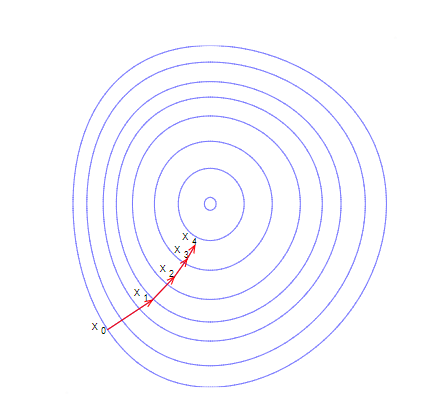

**paso que sigue el método del descenso de gradiente**.



# Método del Gradiente conjugado
El método del descenso del gradiente es un algoritmo de optimización que permite converger hacia el valor mínimo de una función mediante un proceso iterativo.

Para identificar el mínimo de la función el método del descenso del gradiente calcula la derivada parcial respecto a cada parámetro en el punto de evaluación. La derivada indica el valor y sentido en que se encuentra el mínimo más próximo.
Este puede ser tanto un mínimo local como global, el método no los puede diferenciar.

# Método de Nelder Mead
Este método toma $n+1$  puntos en $n$ dimensiones y busca de manera aproximada una solución óptima local al problema cuando la función a minimizar varía suavemente. A estos  puntos se les conoce como un Simplex que va cambiando con cada iteración del método aplicado, pues en cada paso este se encarga de cambiar el punto mas lejano al mínimo por uno que se encuentre mas cerca de este.

Dado que la gráfica de la función a evaluar vive en $R^2$, el simplex a tomar en cada paso debe tener 3 puntos. Nos vemos entonces interesados en conocer el simplex en la última iteración realizada por el programa, también la evaluación de la función en estos 3 puntos. Definimos entonces una función que nos guarde los datos para cada iteración, a esta la llamaremos store.

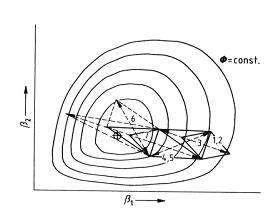

# Método de FBGS
 BFGS determina la dirección de descenso preacondicionando el gradiente con información de curvatura. Lo hace mejorando gradualmente una aproximación a la matriz de Hessenia de la función de pérdida,obtenida solo a partir de evaluaciones de gradiente (o evaluaciones de gradiente aproximado) a través de un método secante generalizado.

# Aplicación de los métodos de Optimización en varias variables en la Funcion Matyas
## Gráfica de la función de Matyas

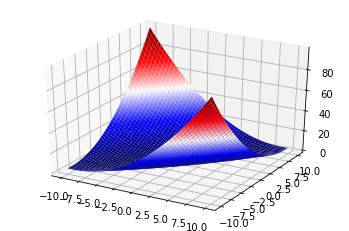

In [122]:
from matplotlib import cm
fig,ax = plt.subplots(subplot_kw={"projection":"3d"})
x=np.arange(-10,10,0.1)
y=np.arange(-10,10,0.1)
X,Y = np.meshgrid(x,y)
Z= 0.26*((X**2)+(Y**2))-0.48*(X*Y)
surf = ax.plot_surface(X,Y,Z, cmap=cm.seismic)
plt.show()


Primero vamos a necesitar el gradiente y la Hessiana de la función ya que algunos métodos van a necesitar eso, entonces tanto el gradiente como el jaccobiano y la Hessiana fueron calculados a manos. Por lo tanto empecemos con el gradiente.
$$\nabla F(x,y)=\langle \frac{\partial F}{\partial x},\frac{\partial F}{\partial y}  \rangle$$
$\nabla F(x,y)= 0.56x-0.48y, 0.56y-0.48x$.

Seguimos con el jaccobiano:

$$ J_{R} (x,y)= \begin{pmatrix} 0.56x-0.48y  \\ 0.56y-0.48x   \end{pmatrix}  $$ 

luego el Hessiano:
$$ H_{R} (x,y)= \begin{pmatrix} 0.56 & -048  \\ -0.48 & 0.56 \end{pmatrix}  $$
 
Ahora haremos algunos restrigiones en nuestro dominio para el proceso de optimización, tambien definiremos una malla, brakets.


In [192]:
#Se define el gradiente
def Df(x):
  return np.array([0.56*(x[0]) - 0.48*(x[1]), 0.56*(x[1]) - 0.48*(x[0])])

In [199]:
#Se define el jacobiano
def Jf(x):
  deri = np.zeros_like(x)
  deri[0]= (0.56*x[0]-0.48*x[1])
  deri[1]= (0.56*x[1]-0.48*x[0])
  return deri

In [194]:
#Se define la Hessiana
def Hf(x):
  x = np.asarray(x)
  He = np.diag([0.56 , 0.56 ])
  He[1,0]= -0.48
  He[0,1]= -.48
  return He

In [150]:
# restriciones del dominio donde se mueve x,y
x_min, x_max = -10, 10
y_min, y_max = -10, 10

In [151]:
#particiones para el eje x, eje y 
#partición eje x
xx = np.linspace(x_min,x_max,100) 
#particion eje y
yy = np.linspace(y_min,y_max,100) 
#creación de la malla donde contiene los puntos de (x,y) 
X, Y = np.meshgrid(xx, yy)  

In [152]:
#definamos la funcion de Matyas como x la lista de 2 elementos, es decir x va hacer tanto x como y.
def Matyas(x):
  return (x[0]**2+x[1]-11)**2 + (x[0]+x[1]**2-7)**2
Z=Matyas([X,Y])

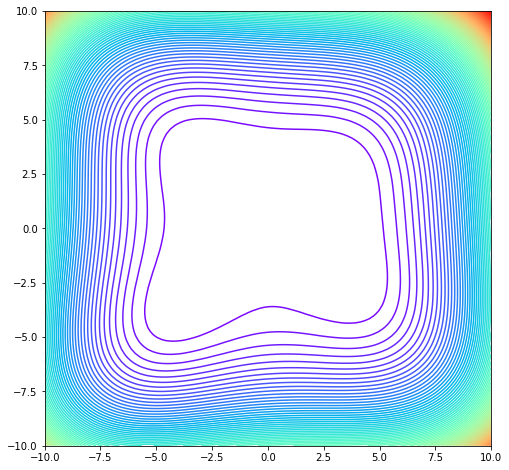

In [153]:
#gráfica de curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 100, cmap="rainbow") 
plt.show()

In [138]:
# Codigo del Método de Nelder Mead 
x0=[-9,-8]
#lista de valores para cada iteración
liX = [x0[0]]
liY = [x0[1]]
liF = [Matyas(x0)]
#función store
def store(X):
    global liX
    global liY
    global liF
    x, y = X
    liX.append(x)
    liY.append(y)
    liF.append(Matyas(X))


Aplicamos ahora el comando Optimize para el método de Nelder-Mead, el cual nos dará los resultados en este orden:

0.Simplex final y evaluación de la función en esos puntos.

1.(fun) Evaluación de la función en el punto encontrado.

2.(message) Indica si la optimización se realizó exitosamente.

3.(nfev) Número de evaluaciones en la función realizadas por el método.

4.(nit) Cantidad de iteraciones.

5.Indica si el método terminó o no.

6.(success) Indica si el proceso llegó o no al mínimo de la función.

7.(x) Es el último punto donde se evaluó la función, el mínimo.

In [139]:
optimize.minimize(Matyas, x0, method="Nelder-Mead",callback=store, options={"xtol": 1e-10})

 final_simplex: (array([[ 3.58442834, -1.84812653],
       [ 3.58442834, -1.84812653],
       [ 3.58442834, -1.84812653]]), array([2.24135493e-20, 6.29546101e-20, 8.80823125e-20]))
           fun: 2.2413549322569302e-20
       message: 'Optimization terminated successfully.'
          nfev: 178
           nit: 92
        status: 0
       success: True
             x: array([ 3.58442834, -1.84812653])

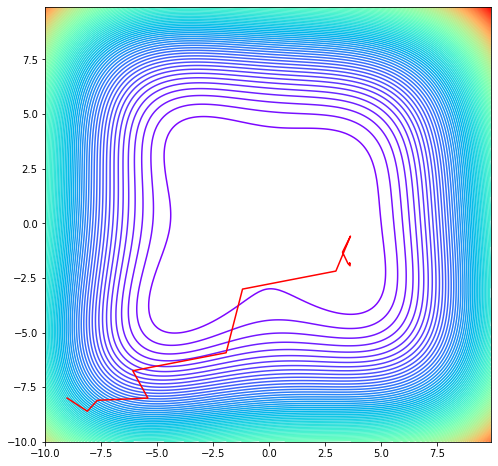

In [140]:
#Haremos la gráfica nuevamente de la curva de nivel pero esta vez agregaremos los puntos guardados de la funcion store
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 100, cmap="rainbow")
plt.plot(liX,liY,color='red') # cabe decir que esta son los puntos guardados en la funcion store

plt.show()



In [173]:
#Método del descenso del gradiente
## emplearemos el codigo del método
### se definen lista vacias  para los puntos de x,y y la evalucion de F(x,y)
lisX=[]
lisY=[]
lisF=[]
def gradient_descent(x1, f, Df):
  x_i, y_i = x1
  for i in range(1,100):
    lisX.append(x_i)
    lisY.append(y_i)
    lisF.append(f([x_i,y_i]))
    dx_i, dy_i= Df([x_i,y_i])
    # se aplica el comando optimize para encontrar al alpha requerido
    alpha = optimize.line_search(f, Df, np.array([x_i,y_i]), -np.array([dx_i, dy_i])) [0] ## [0] por que lo primero que regresa es el alpha, no necesitamos lo demas
    # si no existe el parametro nos dira
    if alpha == None:
      print('No se encontró alpha óptimo')
      break
    x_i += - alpha*dx_i  # x_i = x_i - alpha * dx_i
    y_i += - alpha*dy_i
    if np.abs(liF[-1]) < 1e-16:
      break
    


Hagamos la gráfica de la curvas de nivel de la función Matyas

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


No se encontró alpha óptimo


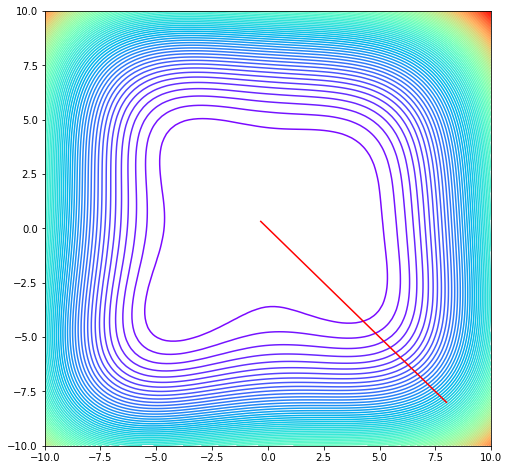

In [174]:
lisX=[]
lisY=[]
lisF=[]
#Punto inicial
x1 = [8,-8]
#Se evalúa la función de descenso
gradient_descent(x1, Matyas, Df)

#Curvas de nivel de la función
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 100, cmap="rainbow")
#Camino de las iteraciones aplicadas por el método
plt.plot(lisX,lisY, color='red')
plt.show()

In [175]:
print('El mínimo de la función dada se encuentra en el punto', [ lisX[-1], lisY[-1]])
print('La función evaluada en el punto mínimo tiene valor de F(x,y)=', lisF[-1])

El mínimo de la función dada se encuentra en el punto [-0.3200000000000003, 0.3200000000000003]
La función evaluada en el punto mínimo tiene valor de F(x,y)= 163.97937152


In [176]:
#método del gradiente conjugado (cg)
## codigo del gradiente conjugado 
x2=[8,-8]

liX_1 = [x2[0]]
liY_1 = [x2[1]]
liF_1 = [Matyas(x2)]

def storecg(X1):
    global liX_1
    global liY_1
    global liF_1
    x, y = X1
    liX_1.append(x)
    liY_1.append(y)
    liF_1.append(Matyas(X1))


El comando Optimize para el método de CG, el cual nos dará los resultados de la siguiente manera orden:

1.(fun) Evaluación de la función en el punto encontrado.

2.(jac).

3.(message) Indica si la optimización se realizó exitosamente.

4.(nfev) Número de evaluaciones en la función realizadas por el método.

5.(nit) Cantidad de iteraciones.

6.(njev)

7.Indica si el método terminó o no.

8.(success) Indica si el proceso llegó o no al mínimo de la función.

9.(x) Es el último punto donde se evaluó la función, el mínimo.


In [180]:
optimize.minimize(Matyas, x2, method="CG", callback=storecg, options={"xtol": 1e-10})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: xtol
  """Entry point for launching an IPython kernel.


     fun: 7.264123035435138e-15
     jac: array([ 2.26372994e-07, -4.48034829e-07])
 message: 'Optimization terminated successfully.'
    nfev: 76
     nit: 9
    njev: 19
  status: 0
 success: True
       x: array([-2.80511809,  3.13131251])

Gráficamos la curva de nivel y esta vez le agregamos los puntos que fueron obtenidos por optimize cg

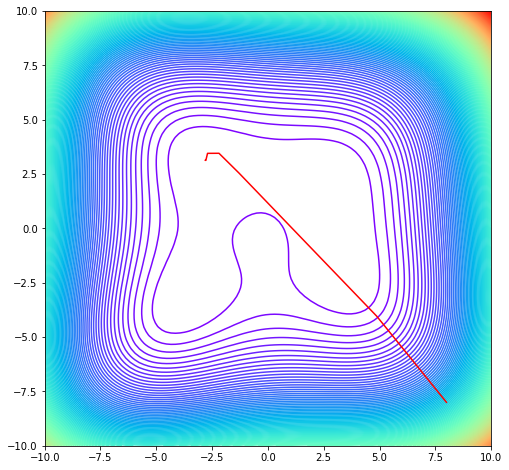

In [186]:
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 150, cmap="rainbow")

plt.plot(liX_1,liY_1, color='red')
plt.show()

Método de BFGS

In [197]:
#Punto inicial para la evaluación
x3=[7,-7]

#Listas de los puntos en x, y y las evaluaciones de la función en cada iteración
listaX = [x3[0]]
listaY = [x3[1]]
listaF = [Matyas(x3)]

#Función store
def storeNCG(X2):
    global listaX
    global listaY
    global listaF
    x, y = X2
    listaX.append(x)
    listaY.append(y)
    listaF.append(Matyas(X2))

El comando Optimize para el método de Newton-CG, el cual nos dará los resultados en este orden en las primeras cinco líneas y la última:

1.El valor mínimo en la función encontrado.

2.El número de iteraciones realizadas.

3.La cantidad de evaluaciones en la función.

4.La cantidad de evaluaciones del gradiente.

5.La cantidad de evaluaciones en la Hessiana.

6.(x) El punto (x,y) encontrado que minimiza la función.


In [200]:
listaX=[]
listaY=[]
listaF=[]
optimize.minimize(Matyas, x3, jac=Jf, hess=Hf, method="Newton-CG", callback=storeNCG, options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 170.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2


     fun: 170.0
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 3
    nhev: 2
     nit: 2
    njev: 4
  status: 0
 success: True
       x: array([0., 0.])

Ahora haremos la gráfica de la curva de nivel de la funcion Matyas y ademas pondremos los puntos que nos dio el comando optimize NEWTON-CG


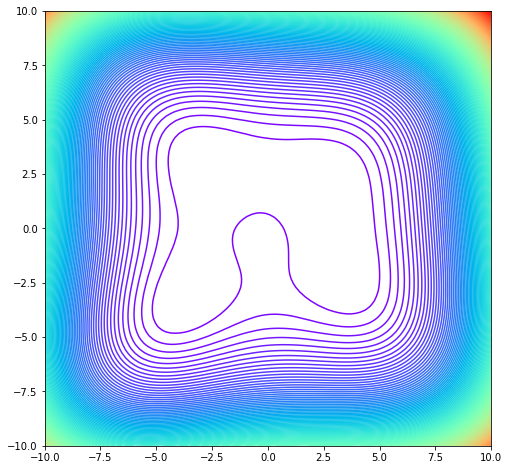

In [201]:
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 150, cmap="rainbow") #nada, coolwarm
plt.plot(listaX,listaY, color='red')
plt.show()

Newton-CG sin hessiana

In [206]:
x4=[-7,7]

liX_2 = [x4[0]]
liY_2 = [x4[1]]
liF_2 = [Matyas(x4)]

def store(X3):
    global liX_2
    global liY_2
    global liF_2
    x, y = X3
    liX_2.append(x)
    liY_2.append(y)
    liF_2.append(Matyas(X3))

In [205]:
liX_2=[]
liY_2=[]
liF_2=[]
optimize.minimize(Matyas, x4, jac=Jf, method="BFGS", callback=store, options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 170.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: OptimizeWarning: Unknown solver options: xtol
  after removing the cwd from sys.path.


      fun: 170.0
 hess_inv: array([[0.98076923, 0.01923077],
       [0.01923077, 0.98076923]])
      jac: array([-4.26325641e-16,  4.97379915e-16])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.0000000e+00, 8.8817842e-16])

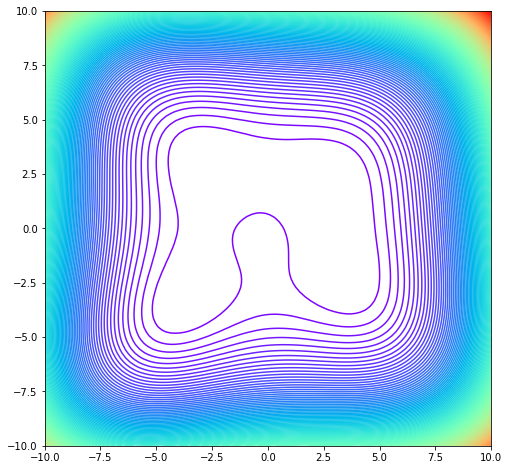

In [208]:
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 150, cmap="rainbow") 
plt.plot(liX_2,liY_2, color='red')

plt.show()

# Error Absoluto de todos los métodos
Calculamos el error en las evaluaciones de la función y haremos su grafica.


In [211]:
#error absoluto Método de Nelder Mead
errorNM = abs(np.array(liF)-0)
errorNM

array([3.36200000e+03, 6.25000000e+03, 1.70000000e+02, 1.70000000e+02,
       1.70000000e+02, 1.70000000e+02, 1.70000000e+02, 1.70000000e+02,
       1.70000000e+02, 1.70000000e+02, 1.70000000e+02, 1.70000000e+02,
       1.70000000e+02, 1.70000000e+02, 1.70000000e+02, 1.70000000e+02,
       1.70000000e+02, 1.70000000e+02, 1.70000000e+02, 1.70000000e+02,
       1.70000000e+02, 1.70000000e+02, 1.70000000e+02, 1.70000000e+02,
       1.70000000e+02, 1.70000000e+02, 1.70000000e+02, 1.70000000e+02,
       1.70000000e+02, 1.70000000e+02, 1.70000000e+02, 1.70000000e+02,
       1.70000000e+02, 1.70000000e+02, 1.70000000e+02, 1.70000000e+02,
       1.70000000e+02, 1.70000000e+02, 1.70000000e+02, 1.70000000e+02,
       1.70000000e+02, 1.70000000e+02, 1.70000000e+02, 1.70000000e+02,
       1.70000000e+02, 1.70000000e+02, 1.70000000e+02, 1.70000000e+02,
       1.70000000e+02, 1.70000000e+02, 1.70000000e+02, 1.70000000e+02,
       1.70000000e+02, 1.70000000e+02, 1.70000000e+02, 1.70000000e+02,
      

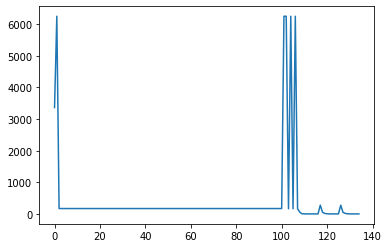

In [212]:
plt.plot(errorNM)

Error absoluto método de descenso del gradiente

In [215]:
#Error en cada iteración
ErrorDG = abs(np.array(lisF)-0)
ErrorDG

array([6250.        ,  163.97937152])

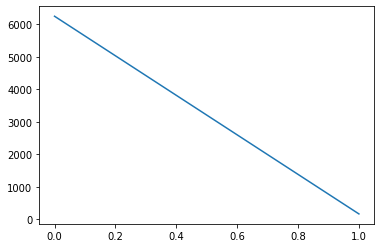

In [214]:
plt.plot(ErrorDG)

Error absoluto gradiente conjugado

In [216]:
#Error en cada iteración
ErrorCG = abs(np.array(liF_1)-0)
ErrorCG

array([6.25000000e+03, 2.76113387e+02, 4.90673591e+01, 1.49890313e+01,
       4.88997223e+00, 2.17762679e-02, 5.33342218e-04, 2.40184468e-06,
       2.54262321e-08, 7.26412304e-15])

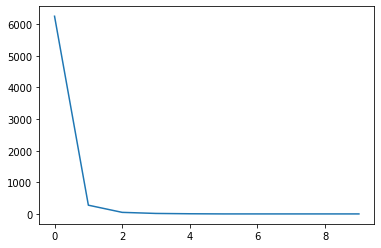

In [217]:
plt.plot(ErrorCG)

Error absoluto de Newton-CG

In [220]:
#Error en cada iteración
ErrorNCG = abs(np.array(listaF)-0)
ErrorNCG

array([170., 170.])

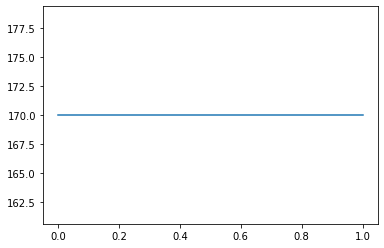

In [221]:
plt.plot(ErrorNCG)

Error absoluto de Newton-CG sin hessiana 


In [224]:
#Error en cada iteración
ErrorNCGSHE = abs(np.array(liF_2)-0)
ErrorNCGSHE

array([3250])

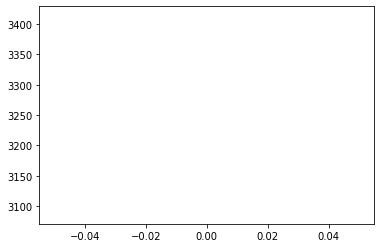

In [225]:
plt.plot(ErrorNCGSHE)

#Comparaciones de los errores absulotos

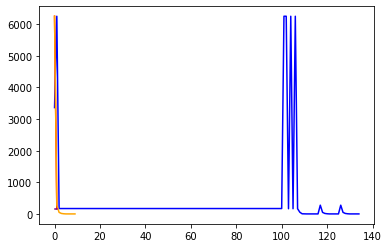

In [226]:
#gráfica de todos los errores absolutos
#Error en Nelder-Mead en azul
plt.plot(ErrorNM, color='blue') #%%%%%%%%%
#Error  descenso del gradiente en rojo
plt.plot(ErrorDG, color='red')
#Error en Gradiente Conjugado en naranja
plt.plot(ErrorCG, color='orange') #%%%%%%%%%
#Error en Newton CG en púrpura
plt.plot(ErrorNCG, color='purple')
#error en Newton CG-sin hessiana
plt.plot(ErrorNCGSHE,color="brown")

# Conclusiones
El método más eficiente fue el de Newton-cg y Newton-cg sin hessiana, ya que los dos en a lo sumo 4 iteraciones ya encontraban el mínimo de la función. Se pudo apreciar que dichos métodos su error fue un punto en la gráfica siendo el mismo que el valor teoríco de la función de Matyas.
Esto se debe que el Método de Newton-CG y Newton-CG sin hessiana sean más precisos porque en teoría al calcular el jaccobiano y el hessiano de la función vamos hallar un exacto de la función, no sucede los mismo en los otros métodos ya son más de tanteo y van generando dichos error al hallar el mínimo.

# Referencias
1.Heath, M. T. (2018). Scientific Computing: An Introductory Survey, Revised Second Edition. Society for Industrial and Applied Mathematics.

2.Chong, E. K., & Zak, S. H. (2004). An introduction to optimization. John Wiley & Sons.


3.   https://www.youtube.com/watch?v=A6FiCDoz8_4&ab_channel=DotCSV
4.   https://www.youtube.com/watch?v=qba9puoS_u4&ab_channel=Dante-Benjam%C3%ADnOsinaga-Torrez


